# Mineria de Texto - Encuesta de Opinion ICFES SABER PRO 2019

## Limpieza y Preparacion

El siguiente Python Notebook contiene el codigo que permite realizar el Analisis de Texto para los resultados de la encuesta de opinion Icfes Saber Pro de estudiantes de ingenieria industrial de la Universidad Industrial de Santander.


In [ ]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:


SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

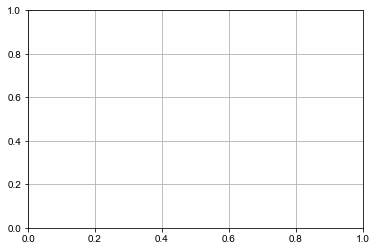

In [ ]:
# Mostrar los dataframes completos

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

plt.grid(True)
sns.set_theme(style="whitegrid")

Para recopilar la información necesaria para realizar el proceso de análisis de sentimientos, se realiza una encuesta virtual por medio de la plataforma Google Forms, con tres preguntas de tipo abiertas que indagan sobre la opinión de los estudiantes de Ingeniería Industrial que presentaron las pruebas Saber Pro en el año 2019, en el cual se sugiere que las respuestas tengan más de cincuenta (50) palabras con el fin de recolectar la mayor cantidad de texto. Esta encuesta es enviada directamente desde el correo de la Escuela de Estudios Industriales y Empresariales, a las bases de datos de los egresados que presentaron las pruebas Saber Pro en el año 2019 y a los estudiantes activos que actualmente estén cursando noveno y décimo semestre.

In [ ]:
#localizacion de los archivos

path_encuestas = "C:\Saber Pro\Resultados_Encuesta_Saber_Pro.xlsx"

In [ ]:
database = pd.read_excel( path_encuestas )
database.drop(columns = 'Marca temporal', inplace = True)
database

,¿Cuál es su opinión respecto al examen Saber Pro?,¿Qué opina del rol que tuvo su universidad en el desempeño de las pruebas Saber Pro?,Describa como fue su experiencia al momento de presentar las pruebas Saber Pro
0,"No me parece la mejor manera de medir la calidad de la educación. Considero que la educación debería evaluarse, además de este tipo de pruebas, a través de practicas obligatorias a todos los estudiantes, donde realmente se vea la aplicación de los conocimientos más allá del ambiente teórico. Creo que la en la prueba debe ponerse situaciones de la vida real tipo casos, en que se deban usar herramienta que si sean útiles en el desarrollo profesional, no ser un examen a,b,c.","Se supone que, el solo hecho de que las preguntas van dirigidas a profesionales pues hace que sin el conocimiento adquirido no se pueda responder prácticamente nada. Sin embargo no creo que la universidad, asegure que sus estudiantes tengan le conocimiento y habilidad necesaria para tener buenas calificaciones.","Básicamente es sentare a leer una evaluación, tal cual como el icfes antes de ingresar a la universidad. No creo que fuera enriquecedora y de manera personal no siento que aplicara realmente lo que se supone que debo hacer en mi carrera profesional. Yo lo alcance a hacer presencialmente, pero, no he recibido mejores conceptos del que se presento de forma virtual."
1,"Son muy generales y suelen preguntar cosas muy específicas de otras carreras que uno desconoce, por lo tanto si hace falta más conocimientos en otras áreas, muchos compañeros de otras carreras de ingenierias opinaban igual, también sentí que la persona a cargo del salón en el que nos encontrábamos haciendo la prueba, no era la suficientemente idónea al explicar, puesto que al estar en un grupo con personas de diferentes universidades y un nivel de educación distinto (incluso personas con alguna incapacidad), esas personas también deben ser capacitadas ya que en estas pruebas se presentan diferentes personas al que su forma de aprendizaje no es igual","Siento que me faltó aprender más cosas, que la metodología de muchos docentes ya está mandada a recoger, pues dictar una cátedra no es solo ir hablar de la vida o leer diapositivas, esto hace que se pierda el interés en la materia y se verá interrumpido el proceso de aprendizaje, también deberían empezar a evaluar los métodos de enseñanza, puesto que hay mucho profesor planta que solo se sienta a leer las presentaciones, en el que semestre a semestre no varía nada, hace falta más aplicabilidad no solo teoría, las prácticas en muchas cátedras son necesarias en el caso de ing industrial en la linea de procesos las prácticas son nulas, y son tan necesarias, y otras áreas como calidad deberían de dejar ser netamente teóricas.","No fue muy buena, por el contrario, de lo más desagradable, las instalaciones, la persona a cargo de cuidar la prueba fue un desastre totaaaal, nada de eso tuvo que pasar, existe mucha improvisación en cuanto a este tipo de pruebas, y más cuando es alguien que no está preparada para explicarle a personas con algún tipo de discapacidad o lento aprendizaje"
2,"Que son pruebas que realmente no miden la capacidad de un profesional previa a su salida a la vida laboral, adicionalmente terminan desmotivando a los estudiantes por un puntaje obtenido como si eso reflejara su verdadero desempeño académico. Son pruebas que someten a las personas a condiciones inadecuadas para su presentación y que representan una carga adicional al estres que representa ver 5 asignaturas o más en la universidad","Senti que en ningún momento el rol de la universidad se complementó o se tuvoen cuenta el desarrollo de actividades enfocadas al examen. Simplemente se solicita para cumplir un requisito de grado, pero no es de gran relevancia al cumplir estándares educativos, los cuales son esperados desde muchos ambitos.","Estresante y de incertidumbre. Las preguntas que encontré en el examen realizado en 2019-2 fueron ambiguas, muchas co

In [ ]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 3 columns):
 #   Column                                                                                Non-Null Count  Dtype 
---  ------                                                                                --------------  ----- 
 0   ¿Cuál es su opinión respecto al examen Saber Pro?                                     54 non-null     object
 1   ¿Qué opina del rol que tuvo su universidad en el desempeño de las pruebas Saber Pro?  54 non-null     object
 2   Describa como fue su experiencia al momento de presentar las pruebas Saber Pro        54 non-null     object
dtypes: object(3)
memory usage: 1.4+ KB


In [ ]:
database.columns = ['P1', 'P2', 'P3']

Despues de importar y organizar la base de datos que contiene las respuestas, se procede a limpiar el texto.

La limpieza consta de: 

- Conversion de todo el texto a minuscula
- Eliminacion de signos de puntuacion
- Eliminacion de simbolos y comillas
- Conversion de punto y aparte en un espacio.

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords

from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer
spanish_stopwords = stopwords.words('spanish')

def text_cleaner(text):
    
    text = text.lower()
    text = re.sub('\[.*?¿\]\%', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…«»]', '', text)
    text = re.sub('\n', ' ', text)
    
    return text

txt_cln = lambda x : text_cleaner(x)

extract_p1 = pd.DataFrame( database['P1'].apply(txt_cln) )
extract_p2 , extract_p3 = pd.DataFrame( database['P2'].apply(txt_cln)) , pd.DataFrame( database['P3'].apply(txt_cln))
extract_p1

exctr = { 'Pregunta 1' : extract_p1.P1.str.cat(sep=' ') , 'Pregunta 2' : extract_p2.P2.str.cat(sep= ' '), 'Pregunta 3' : extract_p3.P3.str.cat(sep=' ')}
extractos = pd.DataFrame( exctr , index = ['Extracto']).transpose()
extractos

Extracto
Pregunta 1  no me parece la mejor manera de medir la calidad de la educación  considero que la educación debería evaluarse  además de este tipo de pruebas  a través de practicas obligatorias a todos los estudiantes  donde realmente se vea la aplicación de los conocimientos más allá del ambiente teórico  creo que la en la prueba debe ponerse situaciones de la vida real tipo casos  en que se deban usar herramienta que si sean útiles en el desarrollo profesional  no ser un examen a b c   son muy generales y suelen preguntar cosas muy específicas de otras carreras que uno desconoce  por lo tanto si hace falta más conocimientos en otras áreas  muchos compañeros de otras carreras de ingenierias opinaban igual  también sentí que la persona a cargo del salón en el que nos encontrábamos haciendo la prueba  no era la suficientemente idónea al explicar  puesto que al estar en un grupo con personas de diferentes universidades y un nivel de educación distinto  incluso personas con alguna incapacidad   esas personas también deben ser capacitadas ya que en estas pruebas se presentan diferentes personas al que su forma de aprendizaje no es igual que son pruebas que realmente no miden la capacidad de un profesional previa a su salida a la vida laboral  adicionalmente terminan desmotivando a los estudiantes por un puntaje obtenido como si eso reflejara su verdadero desempeño académico  son pruebas que someten a las personas a condiciones inadecuadas para su presentación y que representan una carga adicional al estres que representa ver  asignaturas o más en la universidad es un examen demasiado extenso que realmente cansa a las personas que lo presentan  de hecho uno ve estudiantes que responden sin sentido esperando solo el momento en el que se pueda salir del lugar  en mi caso no fue así pero uno siente que después de  horas de lectura sin parar la mente no piensa de manera correcta y empieza a sentirse un cansancio que deriva en respuestas rápidas y sin análisis solo con el fin de pasar a la siguiente  además hay secciones con textos demasiado extensos que se pueden compactar de una mejor manera  y en cuanto al texto que piden realizar al inicio de la prueba  no hay manera de calificar la opinión de una persona respecto a un texto porque cada una de ellas tiene valor  no se puede decir cual opinión es correcta e incorrecta por lo que esta prueba carece de sentido alguno  el exámen es bantante sencillo  muy similar en su forma al exámen saber   con conocimientos básicos y suficiente lógica es posible llegar a las respuestas correctas  es bastante extenso y cansa por lo que eso podría generar respuestas apresuradas y por lo tanto incorrectas  podría ser que enfocarse solo en el componente profesional eliminara este sesgo  por otro lado considero que es importante crear incentivos para motivar a los estudiantes a obtener buenos resultados y que así estas pruebas sirvan para medir con mayor exactitud la excelencia académica  ya que actualmente no hay motivación para esto  creo que es un examen muy importante pues en él se evalúa todo lo aprendido en la carrera además de otros aspectos generales como las matemáticas y comprensión lectora  en general  estuvo bien  la jornada se desarrolló con bastante normalidad                                                                       es un examen que nos mide en algunos conceptos básicos  sin embargo  debería medirnos de acuerdo a casos empresariales de la vida real  aunque tampoco sería justo porque en las clases no nos enseñan la vida real   además qué en la actualidad sea un examen escrito únicamente  no me parece preciso para brindar resultados  si ya se conocen tantas metodologías de aprendizaje   en general  considero que es un examen que se hace para cumplir con el requisito de graduarse  al parecer no hay muchas personas que se tomen en serio esta prueba y  más allá de cumplir con el requisito  no genera un verdadero feedback sobre lo que se supone que es el objetivo de la prueba  en

Se genera un gráfico llamado Wordcloud o en español “nube de palabras”, que es una representación gráfica de las palabras que más se repiten en un texto. La nube de palabras es un objeto de representación visual sencillo pero potente para el tratamiento de textos, que muestra la palabra más frecuente con letras más grandes y más gruesas, y con diferentes colores. Cuanto menor sea el tamaño de la palabra, menor será su importancia.

Primero se genera una nube de palabras para todo el texto respondido por los estudiantes, independientemente de la pregunta.

Text(0.5, 1.0, 'Nube de Palabras de todas las Preguntas')

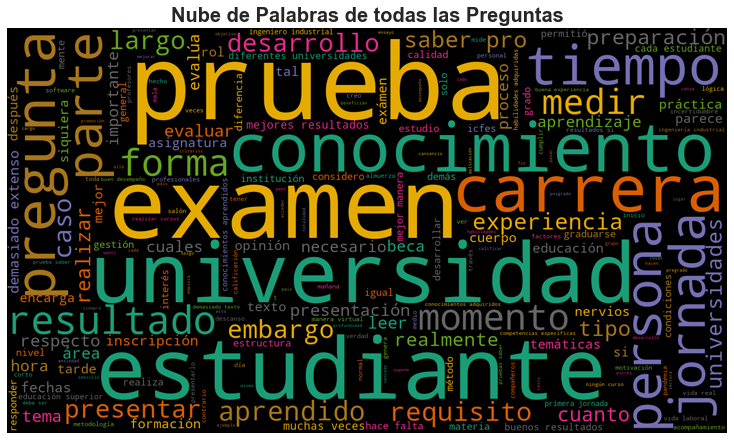

In [ ]:

from wordcloud import WordCloud

wc = WordCloud(stopwords=spanish_stopwords, background_color="black", colormap="Dark2", collocation_threshold = 1,
               max_font_size=200, random_state=42, prefer_horizontal = 0.8, height = 768 , width = 1366 )
 

wc.generate(extractos['Extracto'][0]+extractos['Extracto'][1]+extractos['Extracto'][2])
plt.figure(figsize= (10, 7))
plt.imshow(wc, interpolation = 'spline16')
plt.axis('off')
plt.tight_layout(pad = 0)
plt.title('Nube de Palabras de todas las Preguntas', fontsize = 20, fontweight ='bold')


Las palabras mas utilizadas fueron; prueba, examen, universidad, estudiante, conocimiento, pregunta, tiempo, carrera entre otras. Prueba y examen, son el sujeto del cual se esta indagando, universidad y estudiante, los evaluados, pregunta, un constituyente del examen, conocimiento, lo que se evalua, tiempo y carrera, parametros del examen. Algunas palabras interesantes son; demasiado extenso / demasiado texto, nervios, requisito, grado/graduarse y almuerzo, se concluye que: algunos estudiantes unicamente ven el examen como un requisito para su graduacion, es percibido como extenso, genera nervios y el almuerzo parece jugar cierto rol en el.

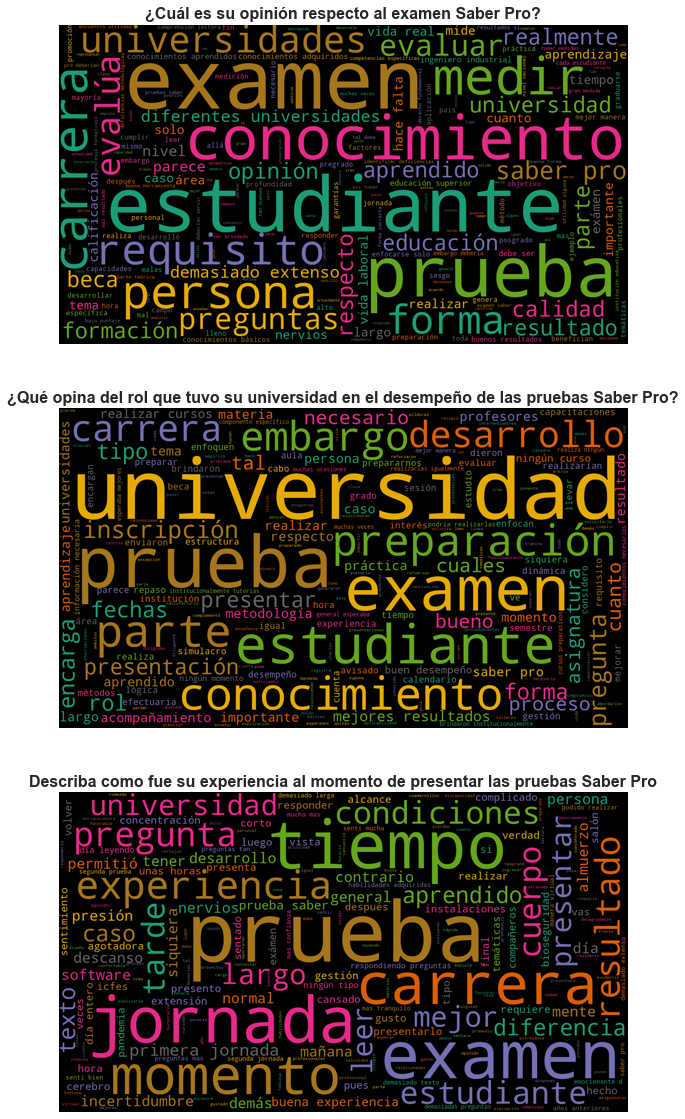

In [ ]:
plt.figure(figsize=(20, 20))

preguntas = ['¿Cuál es su opinión respecto al examen Saber Pro?' ,
            '¿Qué opina del rol que tuvo su universidad en el desempeño de las pruebas Saber Pro?',
            'Describa como fue su experiencia al momento de presentar las pruebas Saber Pro']

# Create subplots for each anio
for i, pregunta in enumerate(extractos.index):
    plt.subplot(3, 1, i+1)
    wc.generate(extractos['Extracto'][pregunta])
    plt.imshow(wc, interpolation='spline16')
    plt.axis("off")
    plt.title('{}'.format(preguntas[i]), fontsize = 16, fontweight = 'bold' )

Las palabras mas usadas acerca de la opinion respecto al examen saber pro por los estudiantes son: examen, estudiante y conocimiento. Estas palabras por sí solas no ofrecen una interpretación acerca de la opinión de los estudiantes encuestados. Sin embargo, si se analizan las palabras escritas con menos frecuencia se pueden encontrar palabras como: deberían ,debería, mejorar, largo; estas últimas palabras pueden ser un indicador de que la opinión de los encuestados acerca de las pruebas Saber Pro no es del todo positiva, sin embargo, para realmente analizar si el pensamiento colectivo de los encuestados es positivo o negativo, más adelante se realiza un análisis de la polaridad del sentimiento de las respuestas de los estudiantes, las palabras interesantes son: calidad, aprendizaje, vida real, vida laboral, realmente, beca, hace falta, demasiado extenso, importante y posgrado. A partir de estas palabras se concluye, que hay un sentimiento generalizado de falta de interes, parcialmente causado por la carencia de beneficios al obtener un buen puntaje, tambien se observa que algunos estudiantes no creen que esta evaluacion mida las habilidades usadas en la vida laboral y el mundo real. 


La palabra mas usada respecto al rol de la UIS en el examen es "Universidad" esto es un resultado evidente ya que es el sujeto sobre el cual recae directamente la pregunta. Las palabras mas interesantes son: buena experiencia, buen desempeño, bueno, ningun curso, mejores resultados, acompañamiento e inscripcion. A partir de estas palabras se concluye, que hay un numero de estudiantes que considera que la UIS hizo un buen acompañamiento, sin embargo hay algunas carencias en cuestiones de cursos. 


Las palabras usadas con mayor frecuencia ante la experiencia de presentar las pruebas Saber Pro son: prueba, tiempo y jornada. Las palabras mas interesantes son: agotadora, presion, demasiado larga, nervios, largo, dia entero y concentracion. A partir de estas palabras se concluye, que algunos estudiantes encuentran las pruebas agotadoras, ya sea por el numero de horas del examen, o el esfuerzo mental requerido para completar todos los modulos.

Para complementar los resultados obtenidos en los WordClouds, se realiza un análisis del sentimiento de los estudiantes encuestados. Para esto se utiliza una inteligencia artificial perteneciente al submódulo SentimentIntensityAnalyzer de la librería vaderSentiment.vaderSentiment de Python. Los resultados obtenidos del análisis de sentimiento son valores entre -1 y 1 para cada respuesta escrita por un estudiante, donde -1 es una opinión muy negativa y 1 es una opinión muy positiva.

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

ai_sentiment = lambda x: analyzer.polarity_scores(x).get('compound')

extract_p1['Sentimiento'] = extract_p1['P1'].apply(ai_sentiment)
extract_p1.to_pickle('extract_p1.pkl')
extract_p2['Sentimiento'] = extract_p2['P2'].apply(ai_sentiment)
extract_p2.to_pickle('extract_p2.pkl')
extract_p3['Sentimiento'] = extract_p3['P3'].apply(ai_sentiment)
extract_p3.to_pickle('extract_p3.pkl')

Los resultados fueron almacenados como archivos pickle, debido a que el modulo usa el API del traductor de google, para calificar los sentimientos que se encuentran en otro idioma diferente a ingles, y este API tiene un limite de consultas en el dia.

In [ ]:
extract_p1 = pd.read_pickle('extract_p1.pkl')
extract_p2 = pd.read_pickle('extract_p2.pkl')
extract_p3 = pd.read_pickle('extract_p3.pkl')

In [ ]:
extract_p2

,Extracto,Sentimiento,Pregunta
0,se supone que el solo hecho de que las preguntas van dirigidas a profesionales pues hace que sin el conocimiento adquirido no se pueda responder prácticamente nada sin embargo no creo que la universidad asegure que sus estudiantes tengan le conocimiento y habilidad necesaria para tener buenas calificaciones,0.4404,Pregunta 2
1,siento que me faltó aprender más cosas que la metodología de muchos docentes ya está mandada a recoger pues dictar una cátedra no es solo ir hablar de la vida o leer diapositivas esto hace que se pierda el interés en la materia y se verá interrumpido el proceso de aprendizaje también deberían empezar a evaluar los métodos de enseñanza puesto que hay mucho profesor planta que solo se sienta a leer las presentaciones en el que semestre a semestre no varía nada hace falta más aplicabilidad no solo teoría las prácticas en muchas cátedras son necesarias en el caso de ing industrial en la linea de procesos las prácticas son nulas y son tan necesarias y otras áreas como calidad deberían de dejar ser netamente teóricas,-0.1280,Pregunta 2
2,senti que en ningún momento el rol de la universidad se complementó o se tuvoen cuenta el desarrollo de actividades enfocadas al examen simplemente se solicita para cumplir un requisito de grado pero no es de gran relevancia al cumplir estándares educativos los cuales son esperados desde muchos ambitos,-0.5091,Pregunta 2
3,la universidad es muy importante en cuanto al desempeño de las pruebas sobre todo en las que hacen énfasis en la carrera de cada uno ya que es desde el aula de clase donde se refuerzan los conceptos necesarios para responder dichas preguntas he conocido casos de personas que presentan este examen sin haber visto la asignatura que se evalúa por lo cual no tienen la capacidad conceptual de saber a qué hace referencia las preguntas presentadas es de vital importancia que los conceptos allí evaluados se haya enseñado previamente en la universidad,0.7425,Pregunta 2
4,en mi experiencia y en términos generales la universidad no afectó directamente sobre mis resultados a excepción del componente correspondiente a gestión de proyectos ya que lo aprendido en la universidad sobre este fue bastante mediocre sin embargo lo aprendido durante los diferentes cursos es suficiente para responder correctamente,0.0000,Pregunta 2
5,pues la universidad se encarga de prepararnos a lo largo de semestres pero ya el examen y los resultados dependen de nosotros como estudiantes en general la universidad fue diligente con todos los procedimientos e inscripción necesaria para que pudiésemos presentar el examen,0.1406,Pregunta 2
6,excelente universidad para enseñar conceptos y aprender mecanismos para dar eficiencientes respuestas tuvo el rol más crucial en el desempeño de las pruebas aunque muchas de las preguntas estaban dirigidas a el estado y gobierno así como a su funcionamiento y eso en ningún momento lo reforzaron más que unas semanas antes del examen las píldoras,0.7506,Pregunta 2
7,fue bueno la universidad brindó espacios de repaso de capacitación y demás que apoyan al estudiante en la presentación de la prueba sería bueno mejorar el tema de la prueba diagnóstico o simulacro que realiza la universidad ya que lo considero bastante alejado de lo que fue la prueba también es bueno el papel de las escuelas en el desarrollo de las competencias específicas aunque cuando lo presenté no las hubo considero que es la parte más importante de la prueba,0.9371,Pregunta 2
8,fueron los intermediadores ya que ellos son los que se encargan de todo el tramite y los estudiantes solo necesitan inscribirse para presentar el examen y pues es mejor así ya que así garantizan la presentación del examen sin contratiempos siendo ellos los que se encargan de todos los tramites,0.5994,Pregunta 2
9,regular no se vio un interés en reforzar los tópicos genéricos especialmente se generaron algo como grupos informativos en los cuales otros compañeros compartían documentos sobre c

In [ ]:
extract_p1.columns , extract_p2.columns, extract_p3.columns  = ['Extracto', 'Sentimiento'] , ['Extracto', 'Sentimiento'], ['Extracto', 'Sentimiento']
extract_p1['Pregunta'] = 'Pregunta 1'
extract_p2['Pregunta'] = 'Pregunta 2'
extract_p3['Pregunta'] = 'Pregunta 3'

extract = extract_p1.append([extract_p2, extract_p3], ignore_index = True)

Despues de calcular el sentimiento para cada una de las respuestas, se crean las visualizaciones univariadas de estos.

Text(0.5, 1.0, 'Describa como fue su experiencia al momento de presentar las pruebas Saber Pro')

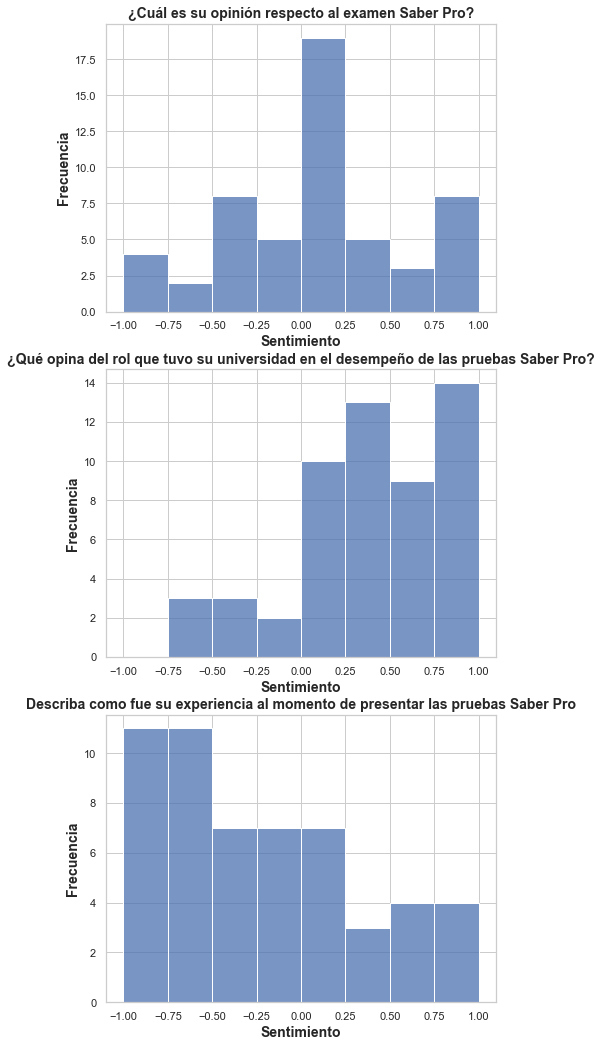

In [ ]:
bins = [-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1]

plt.figure(figsize= (7, 18))

plt.subplot(3,1,1)
sns.histplot(data = extract_p1 , x = 'Sentimiento', bins= bins)
plt.ylabel('Frecuencia', fontsize = 14, fontweight = 'bold')
plt.xlabel('Sentimiento', fontsize = 14, fontweight = 'bold')
plt.title(f'{preguntas[0]}', fontsize = 14, fontweight = 'bold')

plt.subplot(3,1,2)
sns.histplot(data = extract_p2 , x = 'Sentimiento', bins= bins)
plt.ylabel('Frecuencia', fontsize = 14, fontweight = 'bold')
plt.xlabel('Sentimiento', fontsize = 14, fontweight = 'bold')
plt.title(f'{preguntas[1]}', fontsize = 14, fontweight = 'bold')

plt.subplot(3,1,3)
sns.histplot(data = extract_p3 , x = 'Sentimiento', bins= bins)
plt.ylabel('Frecuencia', fontsize = 14, fontweight = 'bold')
plt.xlabel('Sentimiento', fontsize = 14, fontweight = 'bold')
plt.title(f'{preguntas[2]}', fontsize = 14, fontweight = 'bold')

Acerca de la opinion de los estudiantes con respecto al examen se puede concluir que la mayoría de los encuestados tienen una percepción ligeramente positiva (sentimiento cercano a 0 por la derecha), seguido de los intervalos [-0.5: 0.25] y [0.75: 1]. Se concluye que la mayoria de los estudiantes tienen sentimientos neutros hacia las pruebas en general, un grupo siente una mediana aversion y otro una opinion muy positiva hacia estas. Las opiniones sobre estas pruebas son diversas, sin embargo tienden a ser neutrales. Un ejemplo de las opiniones positivas del examen son:

- “me parece una buena herramienta para evaluar la calidad de la educación superior en colombia pero en igual medida para evaluar los conocimientos que como estudiantes adquirimos y desarrollamos en nuestra institución educativa igualmente por medio de este exámen se puede conocer la calidad de profesionales que salen al mundo laboral a poner en práctica los conocimientos adquiridos durante la carrera”. 

- “es útil para medir las competencias de los estudiantes y comparar los resultados y las habilidades que se adquieren en las diferentes universidades del país permite al gobierno dar direcciones para mejorar las políticas educativas y una mejor administración de los recursos permite a las instituciones de educación mejorar”. 

- “considero que este examen es necesario para realizar una retroalimentación de los conocimientos pero no deberían hacerlo tan extenso”. 

Respecto a la opinion de los estudiantes con el rol que tuvo la UIS en sus pruebas, las opiniones son mayoritariamente positivas, el intervalo con mayor numero de integrantes es el de [0.75: 1] seguido por [0.25: 0.5], aunque hay entrevistados con una opinion negativa, estos son pocos en comparacion con el total. Algunas de las respuestas son:

- “Pues, la universidad se encarga de prepararnos a lo largo de 10 semestres, pero ya el examen y los resultados dependen de nosotros como estudiantes. En general la universidad fue diligente con todos los procedimientos e inscripción necesaria para que pudiésemos presentar el examen”

- “La universidad a lo largo de la carrera proporciona bases para la presentaciòn de esas pruebas. Sin embargo, en cuanto a preparaciòn especìfica creo que se està quedando corta en el apoyo hacia los estudiantes, en este caso podrìa ser la propia Escuela. En mi caso prepare el examen por mi propia cuenta con repasos y demàs y el resultado para mi fue satisfactorio. Las charlas que la universidad proporciona para los componentes generales son bàsicas y sirven”

- “La universidad me dio las herramientas y los conocimientos necesarios para presentar las pruebas, una formación académica durante diez semestres, aunque considero que el desempeño también adquiere un carácter muy individual que depende del tipo de persona y el compromiso asumido. Las universidades ven medido su rendimiento mediante este tipo de pruebas”

La opinion de los estudiantes acerca de la experiencia de presentar las pruebas es en su mayoria negativa, los intervalos con el mayor numero de encuestados son [-1: -0.75] y [-0.75: -0.5], algunas de las respuestas dadas son:

- “No fue muy buena, por el contrario, de lo más desagradable, las instalaciones, la persona a cargo de cuidar la prueba fue un desastre totaaaal, nada de eso tuvo que pasar, existe mucha improvisación en cuanto a este tipo de pruebas, y más cuando es alguien que no está preparada para explicarle a personas con algún tipo de discapacidad o lento aprendizaje”

- “Estresante y de incertidumbre. Las preguntas que encontré en el examen realizado en 2019-2 fueron ambiguas, muchas con concepto político y connotación despectiva frente a minorias. Algunas preguntas estaban relacionadas con campos totalmente diferentes a la ingeniería industrial, teniendo que realizar conjeturas de temáticas como quimica, geología y física. Senti que estas pruebas realmente no reflejan mi proceso de aprendizaje, ni ponen en practica habilidades que son valiosas hoy en el mundo laboral. Tener que disponer de un día de descanso para una actividad como estas me parece inadecuado.”

- “La experiencia es volver a presentar una prueba saber común y corriente, con la diferencia de que vas sin la presión de un resultado. Así como vas más relajado, también te esfuerzas menos. Sales de la prueba con la certeza de que cumpliste el requisito de grado, pero en lo personal nunca me intereso conocer mis resultados ya que estos no definían mis habilidades como profesional.”

In [ ]:
extract.groupby('Pregunta').agg('mean').transpose().round(3)

Pregunta,Pregunta 1,Pregunta 2,Pregunta 3
Sentimiento,0.067,0.393,-0.228


Despues de obtener el promedio de los sentimientos por pregunta, y a partir de las nubes de palabras se infiere que:

- Acerca del examen en general, los estrevistados en promedio no exhiben emociones fuertes hacia el, se manifiesta una disconformidad acerca de su magnitud, falta de congruencia con la vida laboral y carencia de estimulos para un buen desempeño, y por otro lado se recalca que es un requisito necesario para medir la calidad de la educacion.

- En cuanto al rol de la universidad, los estrevistados muestran en promedio una actitud medianamente positiva, se remarca el acompañamiento en cuanto al proceso de inscripcion y a la formacion brindada, tambien se menciona la presencia o falta de cursos para la preparacion.

- En cuanto a la experiencia de presentar las pruebas, los entrevistados en promedio comunican una opinion ligeramente negativa, en la nube se hace mencion al cansancio, las jornadas, las condiciones, se menciona que la prueba es larga, estos factores parecen ser los que hacen de la prueba una experiencia no tan amena.
